In [25]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from skimage import color
import numpy as np
from skimage import io

In [12]:

from google.colab import files

uploaded = files.upload()

Saving test.jpeg to test.jpeg


In [44]:

import numpy as np
from PIL import Image
from scipy import stats
import skimage.measure 

def image_q1(img):
    img1 = Image.open(img)
    print("Original Image")  
    img2 = Image.open(img).convert("L")  
    img_np = np.array(img2)                     
   
    width,height = img2.size
    print("size of image",width*height*8)
    print("dimension of image",img2.size)
    print("bit depth ", img_np.dtype)
image_q1("test.jpeg")

Original Image
size of image 796800
dimension of image (332, 300)
bit depth  uint8


In [46]:
# question 2 entropy of 
def Entropy_image(img):
    img2 = Image.open(img).convert("L")
    entropy = skimage.measure.shannon_entropy(img2)
    print("Entropy",entropy)

Entropy_image("test.jpeg")



Entropy 7.456282831666836


In [50]:

#question num 3
def flip_image_vertically(img):
    img2 = Image.open(img).convert("L")
    img2 = img2.rotate(180)
    img2.show()
    
flip_image_vertically("test.jpeg")

In [29]:
#qs 4
def negative_image(img):
    img = cv2.imread(img,cv2.IMREAD_GRAYSCALE) 
    my_img = np.array([1-x for x in img])
    cv2.imwrite('negative_image.png', my_img)
    
    
negative_image("test.jpeg")

In [51]:
# qs 7
def contrast_image(img):
    img1 = cv2.imread(img)
    Y = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)[:,:,0]
    min = np.min(Y)
    max = np.max(Y)
    contrast = (max-min)/(max+min)
    print("min max contrast:",min,max,contrast)

contrast_image("test.jpeg")

min max contrast: 0 255 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


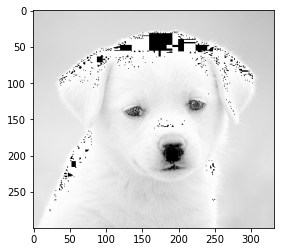

In [31]:
#qs 9
def log_transform_image():
    image = cv2.imread('test.jpeg')   
    c = 255 / np.log(1 + np.max(image))
    log_image = c * (np.log(image + 1))
    log_image = np.array(log_image, dtype = np.uint8)
    plt.imshow(log_image)
    plt.show()
log_transform_image()

In [34]:

#qs 10
def power_law():
    from google.colab.patches import cv2_imshow
    img = cv2.imread('test.jpeg')
    gamma=0.5  
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
    #cv2.imshow('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)
    
power_law()

In [35]:
#qs 11
#Contrast streching  normalize
def normalizeRed(intensity):
    iI  = intensity
    minI = 86
    maxI = 230
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

def normalizeGreen(intensity):
    iI = intensity
    minI = 90
    maxI = 225
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

def normalizeBlue(intensity):
    iI = intensity
    minI = 100
    maxI = 210
    minO = 0
    maxO = 255
    iO = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

imageObject = Image.open("test.jpeg")
multiBands  = imageObject.split()
normalizedRedBand = multiBands[0].point(normalizeRed)
normalizedGreenBand = multiBands[1].point(normalizeGreen)
normalizedBlueBand = multiBands[2].point(normalizeBlue)
normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))
imageObject.show()

normalizedImage.show()
